In [1]:
#Palustre, James Harold A.
#COE005 - Practice Exercise
#Utilized CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [2]:
#Gathered and Imported the Datasets
train_path = "Train"
test_path = "Test"
valid_path = "Validation"

In [3]:
#Selecting Training and Test Batches from Datasets
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['Covid','Normal','Viral Pneumonia'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['Covid','Normal','Viral Pneumonia'], batch_size=10, shuffle=False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [4]:
#Plotting the Samples
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

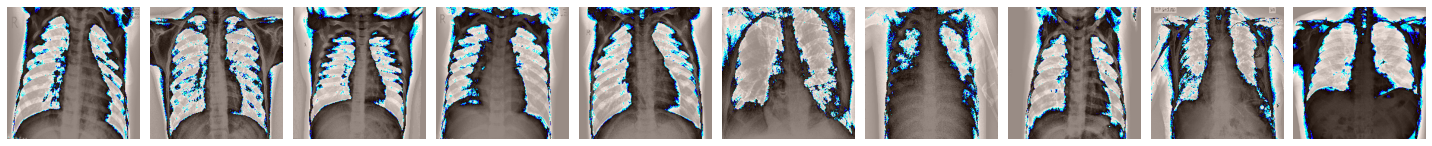

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
#Printing the Classes of each sample but in an Array
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [6]:
#Creation of Model
#I replaced the Dense Units to 3 instead of 2

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [7]:
#Summarize the Model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [8]:
#Compiling the Layers of the Model
#I chose adam optimizer with default learning

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Training the Model with 10 batch size

batch_size =  16 

model.fit(
    x = train_batches, 
    steps_per_epoch=train_batches.samples // batch_size, 
    epochs=20, 
    validation_data=test_batches, 
    validation_steps=test_batches.samples // batch_size,
    verbose=2)

Epoch 1/20
15/15 - 18s - loss: 301.5870 - accuracy: 0.4765 - val_loss: 2.6347 - val_accuracy: 0.8000 - 18s/epoch - 1s/step
Epoch 2/20
15/15 - 18s - loss: 2.6601 - accuracy: 0.7450 - val_loss: 0.7557 - val_accuracy: 0.7750 - 18s/epoch - 1s/step
Epoch 3/20
15/15 - 17s - loss: 0.5872 - accuracy: 0.9195 - val_loss: 1.5596 - val_accuracy: 0.3500 - 17s/epoch - 1s/step
Epoch 4/20
15/15 - 17s - loss: 0.3261 - accuracy: 0.8600 - val_loss: 1.0707 - val_accuracy: 0.5250 - 17s/epoch - 1s/step
Epoch 5/20
15/15 - 19s - loss: 0.1876 - accuracy: 0.9533 - val_loss: 0.3650 - val_accuracy: 0.9250 - 19s/epoch - 1s/step
Epoch 6/20
15/15 - 16s - loss: 0.1143 - accuracy: 0.9866 - val_loss: 0.5839 - val_accuracy: 0.8000 - 16s/epoch - 1s/step
Epoch 7/20
15/15 - 17s - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.5717 - val_accuracy: 0.8250 - 17s/epoch - 1s/step
Epoch 8/20
15/15 - 18s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.5605 - val_accuracy: 0.8000 - 18s/epoch - 1s/step
Epoch 9/20
15/15 - 18s - loss:

In [10]:
#Initial Prediction for Medical
#The output should be three values each

predictions = model.predict(x = test_batches, verbose=0)
print(predictions)

[[1.00000000e+00 3.48924867e-09 2.57277033e-10]
 [1.00000000e+00 5.49173814e-12 3.08062969e-14]
 [9.21487272e-01 6.28118403e-03 7.22315311e-02]
 [1.00000000e+00 3.44107640e-08 2.31524044e-08]
 [1.00000000e+00 4.86353308e-13 8.60263496e-16]
 [1.00000000e+00 2.63319144e-08 7.28533137e-11]
 [9.99230862e-01 7.44839432e-04 2.43307732e-05]
 [9.98565495e-01 1.41322450e-03 2.12744144e-05]
 [9.61660624e-01 3.80034409e-02 3.35895718e-04]
 [9.18488801e-01 6.79306686e-02 1.35805802e-02]
 [9.48602021e-01 5.92121901e-03 4.54768166e-02]
 [9.99998808e-01 9.55472046e-07 2.69251757e-07]
 [9.99936104e-01 1.25240722e-05 5.14183266e-05]
 [9.95162308e-01 1.23588659e-03 3.60183860e-03]
 [6.24373436e-01 3.31897318e-01 4.37293127e-02]
 [9.99999404e-01 5.81292454e-07 3.19634763e-09]
 [9.99999166e-01 4.41036150e-07 4.11875760e-07]
 [9.99978423e-01 1.14964223e-05 1.01630267e-05]
 [9.99987006e-01 1.03208267e-05 2.64187565e-06]
 [9.99989510e-01 8.36068830e-06 2.15753312e-06]
 [9.99230862e-01 7.44839432e-04 2.433077

In [11]:
#Prediction of Samples in Validation Folder

classes=['C','N','V']

label = []
out = []

#Looping for prediction of every image
for i in os.listdir(valid_path):
    val_img = tf.keras.utils.load_img(valid_path+"/"+i,target_size=(224,224))
    val_img = tf.keras.utils.img_to_array(val_img)
    val_img = np.expand_dims(val_img,axis=0)
    predict_x=model.predict(val_img)
    output = classes[np.argmax(predict_x)]
    label.append(i)
    out.append(output)
    print("X-Ray", i,"\n Diagnosis: ", output)

1/1 [==============================] - 0s 142ms/step
X-Ray pic1.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 74ms/step
X-Ray pic10.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 53ms/step
X-Ray pic2.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 48ms/step
X-Ray pic3.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 59ms/step
X-Ray pic4.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 57ms/step
X-Ray pic5.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 54ms/step
X-Ray pic6.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 53ms/step
X-Ray pic7.jpg 
 Diagnosis:  C
1/1 [==============================] - 0s 59ms/step
X-Ray pic8.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 56ms/step
X-Ray pic9.jpeg 
 Diagnosis:  C


Covid Chest X-Ray Sample


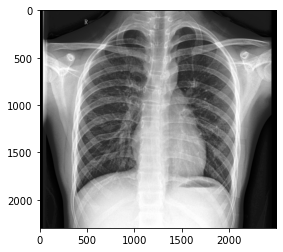

In [12]:
#Displaying Sample of Covid Chest

covid = 'validation/pic1.jpeg'
pic1 = cv2.imread(covid)
plt.imshow(pic1)
print("Covid Chest X-Ray Sample")

Viral Pneumonia Chest X-Ray Sample


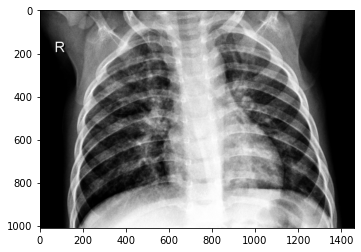

In [13]:
#Displaying Sample of Viral Pneumonia Chest

VP = 'validation/pic4.jpeg'
pic2 = cv2.imread(VP)
plt.imshow(pic2)
print("Viral Pneumonia Chest X-Ray Sample")

In [14]:
#Putting Labels and Tabulation for Prediction

lbl = pd.DataFrame(label, columns = ["X-Ray"])
out = pd.DataFrame(out, columns = ['Diagnosis'])

final_output = pd.concat([lbl, out], axis = 1)
final = final_output.set_index("X-Ray")
print(final)

           Diagnosis
X-Ray               
pic1.jpeg          C
pic10.jpeg         C
pic2.jpeg          C
pic3.jpeg          C
pic4.jpeg          V
pic5.jpeg          N
pic6.jpeg          C
pic7.jpg           C
pic8.jpeg          V
pic9.jpeg          C


In [15]:
#Outputting to CSV File
final.to_csv('Palustre_cnn_output.csv')